refresh

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tools import read_merged_data
import warnings
import seaborn as sns
from fast_tools import get_data
warnings.filterwarnings("ignore")
random_state = 42
np.random.seed(random_state)

ModuleNotFoundError: No module named 'tools'

In [3]:
merged_data = get_data(min_n=0, max_n=1)
dataframes = [pd.DataFrame(d[0]) for d in merged_data if isinstance(d[0], np.ndarray)]
merged_df = pd.concat(dataframes, axis=0)

NameError: name 'get_data' is not defined

In [9]:
merged_df

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
352966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
352967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
352968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
import pandas as pd
import numpy as np

# Assuming merged_df is your DataFrame

# Initialize the most negative number as zero (since we're only interested in negative numbers)
most_negative = 0
# Initialize the count of more negative numbers encountered
negative_count = 0

# Iterate through each column and then each value in the column
for column in merged_df.columns:
    for value in merged_df[column]:
        # Check if the current value is more negative than any we've seen before
        if value < most_negative:
            # Update the most negative number encountered
            most_negative = value
            # Add the absolute value of the difference between current value and -1 (since we count negatives)
            negative_count += abs(value) - abs(most_negative - 1)

print(f"Total count of more negative numbers encountered: {negative_count}")


NameError: name 'merged_df' is not defined

columns are price 
rows is time

This shows bids and asks at a certain price  
for example there are 6 bids at price level 1   
... there is 1 ask at price level 800

Find distribution of asks and bids on first day


Bids Distribution 

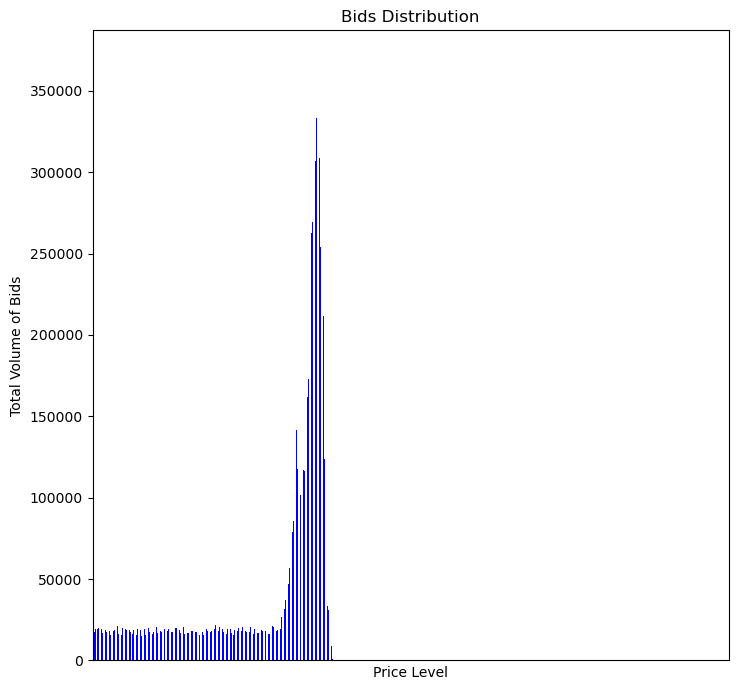

In [15]:
bids = merged_df.applymap(lambda x: x if x < 0 else 0)  

total_bids = bids.sum(axis=0).abs()  

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
total_bids.plot(kind='bar', color='blue')
plt.title('Bids Distribution')
plt.xlabel('Price Level')
plt.ylabel('Total Volume of Bids')
plt.xticks([])  
plt.tight_layout()


Asks Distribution

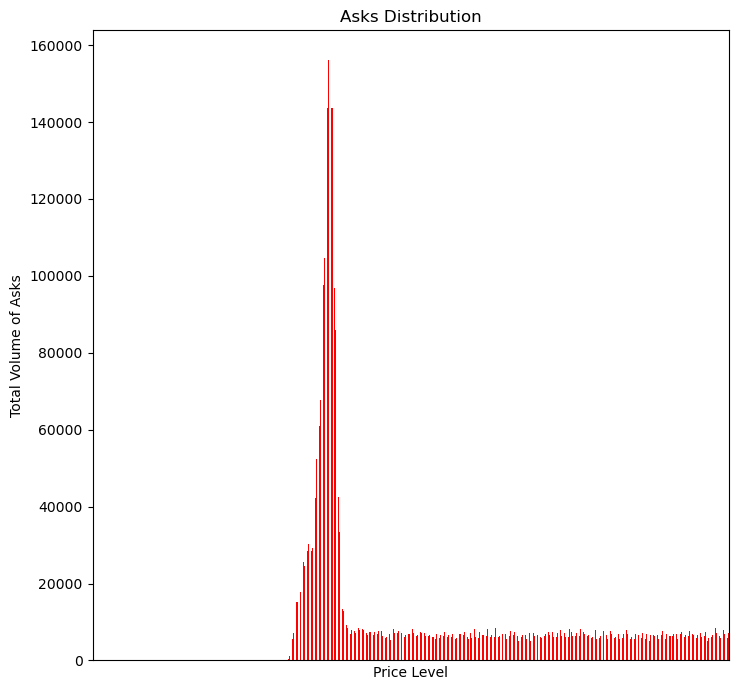

In [16]:

asks = merged_df.applymap(lambda x: x if x > 0 else 0) 

total_asks = asks.sum(axis=0)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
total_asks.plot(kind='bar', color='red')
plt.title('Asks Distribution')
plt.xlabel('Price Level')
plt.ylabel('Total Volume of Asks')
plt.xticks([])  
plt.tight_layout()
plt.show()



In [17]:
print("Bids Summary:")
print(total_bids.describe())

print("\nAsks Summary:")
print(total_asks.describe())

Bids Summary:
count       800.000000
mean      16247.736250
std       45997.301761
min           0.000000
25%           0.000000
50%           0.000000
75%       17550.250000
max      368710.000000
dtype: float64

Asks Summary:
count       800.000000
mean       8651.470000
std       19624.078942
min           0.000000
25%           0.000000
50%        6210.500000
75%        7062.250000
max      156034.000000
dtype: float64


In [20]:
merged_df

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
352966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
352967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
352968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


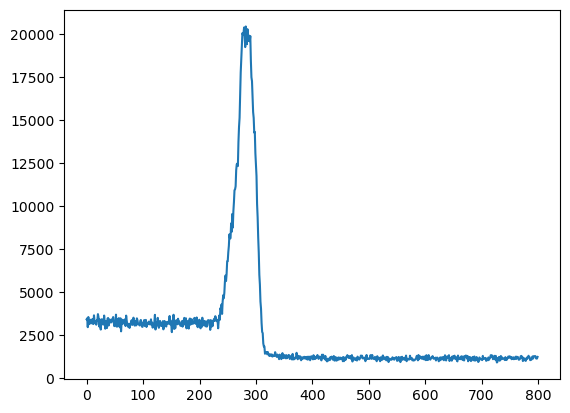

In [44]:
order_weighted_activity = []
for p_level in range(800):
    diff = merged_df[p_level].diff()
    order_weighted_activity.append(np.sum(np.abs(diff)))
plt.plot(order_weighted_activity)

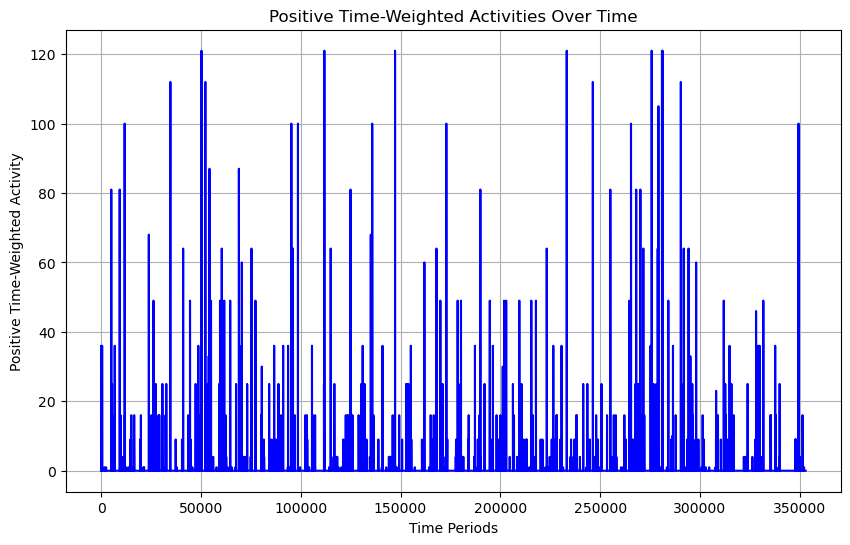

Positive Time-Weighted Activities: [0, 6, 6, 6, 6, 6, 6, 6, 36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

time_weighted_activities = []

for i in range(1, len(merged_df)):
    t1 = merged_df.iloc[i-1, 0]
    t2 = merged_df.iloc[i, 0]
    if t1 != t2:
        time_weighted_activity = abs((t2 - t1) * t1)
    else:
       time_weighted_activity = abs(t1) 
    time_weighted_activities.append(time_weighted_activity)

total_time_weighted_activity = sum(time_weighted_activities)

plt.figure(figsize=(10, 6))
plt.plot(time_weighted_activities, linestyle='-', color='b')
plt.title('Positive Time-Weighted Activities Over Time')
plt.xlabel('Time Periods')
plt.ylabel('Positive Time-Weighted Activity')
plt.grid(True)
plt.show()

print("Positive Time-Weighted Activities:", time_weighted_activities)
print("Total Positive Time-Weighted Activity:", total_time_weighted_activity)
